4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 16s 9ms/step - loss: 0.5589 - accuracy: 0.8052 - val_loss: 0.4309 - val_accuracy: 0.8466
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4126 - accuracy: 0.8505 - val_loss: 0.3770 - val_accuracy: 0.8588
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3758 - accuracy: 0.8623 - val_loss: 0.4005 - val_accuracy: 0.8537
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3512 - accuracy: 0.8724 - val_loss: 0.3342 - val_accuracy: 0.8790
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3347 - accuracy: 0.8767 - val_loss: 0.3386 - val_accuracy: 0.8776
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3212 - accuracy: 0.8804 - val_loss: 0.3467 - val_accuracy: 0.8720
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - lo

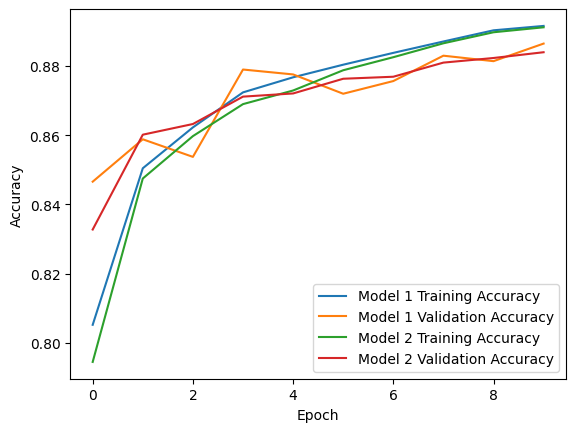

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split data into training and test sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define ANN models
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train models
model1 = create_model()
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

model2 = create_model()
history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

# Model Evaluation
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

print("Model 1 Test Accuracy:", test_acc1)
print("Model 2 Test Accuracy:", test_acc2)

# Plot training history
plt.plot(history1.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
